In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
f_name = 'evaluation_csv/network_growth high_hater_follow_probs_and_normal_reposts_hater-->num_haters-table_rectangle.csv'
# f_name = 'evaluation_csv/network_growth high_hater_follow_probs_and_normal_reposts_hater-->num_haters-table_triangle.csv'
# f_name = 'evaluation_csv/network_growth normal_reposts_hater_0_1000-table.csv'

df_raw = pd.read_csv(f_name, skiprows=6)
df = df_raw[[
    '[run number]',
    '[step]',
    'p_normal_reposts_hater',
    'hateful-node-percents',
    'plot-smoothed-mean-path-length true',
    'plot-smoothed-num-posts true',
    # 'percents-hateful-persons',
    # 'percents-hateful-posts',
    # 'mean-path-length true',
    'swap-to-hate',
]]
df = df.sort_values(by=[
    '[run number]',
    '[step]',
    'p_normal_reposts_hater',
])

In [3]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 8 to 1247
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   [run number]                         1250 non-null   int64  
 1   [step]                               1250 non-null   int64  
 2   p_normal_reposts_hater               1250 non-null   float64
 3   hateful-node-percents                1250 non-null   float64
 4   plot-smoothed-mean-path-length true  1250 non-null   float64
 5   plot-smoothed-num-posts true         1250 non-null   float64
 6   swap-to-hate                         1250 non-null   bool   
dtypes: bool(1), float64(4), int64(2)
memory usage: 69.6 KB


In [4]:
# pd.options.display.max_rows = 100
df

,[run number],[step],p_normal_reposts_hater,hateful-node-percents,plot-smoothed-mean-path-length true,plot-smoothed-num-posts true,swap-to-hate
8,1,1001,0.01,3.2,0.015658,1.52,False
3,2,1001,0.01,3.3,0.011569,1.02,False
6,3,1001,0.01,5.1,0.014332,1.87,False
9,4,1001,0.01,7.2,0.015092,2.73,False
5,5,1001,0.01,3.2,0.013469,0.98,False
...,...,...,...,...,...,...,...
1242,1246,1001,0.49,11.0,0.036652,20.34,False
1248,1247,1001,0.49,15.2,0.040306,42.45,False
1246,1248,1001,0.49,11.7,0.042336,29.03,False
1249,1249,1001,0.49,11.6,0.036703,32.79,False


In [5]:
print('hateful-node-percents')
# df_nodes = df[df['swap-to-hate'] == False].groupby(['p_normal_reposts_hater'])['percents-hateful-persons'].agg([
df_nodes = df[df['swap-to-hate'] == False].groupby(['p_normal_reposts_hater'])['hateful-node-percents'].agg([
    np.min,
    np.mean,
    np.max,
    np.std
])
df_nodes.columns = ['amin', 'hateful_nodes', 'amax', 'std']
df_nodes

hateful-node-percents


,amin,hateful_nodes,amax,std
p_normal_reposts_hater,,,,
0.01,2.2,4.446,8.1,1.391110
0.03,0.5,4.762,8.0,1.451655
0.05,2.6,6.126,10.0,2.121687
0.07,0.5,6.842,12.4,2.765464
0.09,1.2,7.070,11.8,2.342618
0.11,3.4,8.432,12.5,2.325146
0.13,3.2,9.602,13.4,2.672879
0.15,0.9,9.468,13.8,3.218216
0.17,1.8,10.444,14.6,2.569774


<AxesSubplot:xlabel='p_normal_reposts_hater', ylabel='hateful_nodes'>

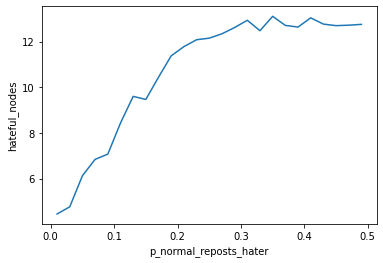

In [6]:
df_plot = df_nodes.reset_index()
sns.lineplot(data=df_plot, x="p_normal_reposts_hater", y="hateful_nodes")

In [7]:
print('mean-path-length hateful')
# df_path = df[df['swap-to-hate'] == False].groupby(['p_normal_reposts_hater'])['mean-path-length true'].agg([
df_path = df[df['swap-to-hate'] == False].groupby(['p_normal_reposts_hater'])['plot-smoothed-mean-path-length true'].agg([
    np.min,
    np.mean,
    np.max,
    np.std
])
df_path.columns = ['amin', 'hateful_path_len', 'amax', 'std']
df_path

mean-path-length hateful


,amin,hateful_path_len,amax,std
p_normal_reposts_hater,,,,
0.01,0.007909,0.014363,0.021793,0.002308
0.03,0.000000,0.014620,0.021538,0.003649
0.05,0.009400,0.015508,0.020505,0.002648
0.07,0.007222,0.014333,0.019287,0.002632
0.09,0.005000,0.015159,0.020818,0.002786
0.11,0.010042,0.015472,0.019505,0.002291
0.13,0.009500,0.015517,0.021743,0.002695
0.15,0.007857,0.016652,0.022509,0.002881
0.17,0.012481,0.017024,0.026065,0.002566


<AxesSubplot:xlabel='p_normal_reposts_hater', ylabel='hateful_path_len'>

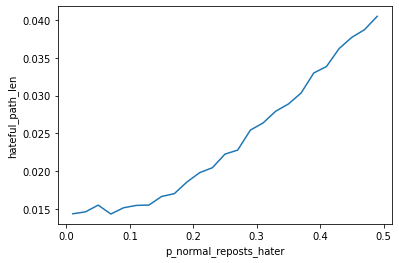

In [8]:
df_plot = df_path.reset_index()
sns.lineplot(data=df_plot, x="p_normal_reposts_hater", y="hateful_path_len")

In [9]:
print('num-posts hateful')
# df_posts = df[df['swap-to-hate'] == False].groupby(['p_normal_reposts_hater'])['percents-hateful-posts'].agg([
df_posts = df[df['swap-to-hate'] == False].groupby(['p_normal_reposts_hater'])['plot-smoothed-num-posts true'].agg([
    np.min,
    np.mean,
    np.max,
    np.std
])
df_posts.columns = ['amin', 'hateful_posts_percents', 'amax', 'std']
df_posts

num-posts hateful


,amin,hateful_posts_percents,amax,std
p_normal_reposts_hater,,,,
0.01,0.54,1.6484,3.48,0.638884
0.03,0.05,1.7988,3.25,0.682551
0.05,0.96,2.3234,3.80,0.698607
0.07,0.18,2.2994,5.05,0.944895
0.09,0.24,2.6154,4.09,0.768506
0.11,1.11,3.1266,5.94,0.835878
0.13,1.43,3.3376,5.80,1.021215
0.15,0.42,3.8014,7.11,1.380248
0.17,1.13,4.0892,6.31,1.198007


<AxesSubplot:xlabel='p_normal_reposts_hater', ylabel='hateful_posts_percents'>

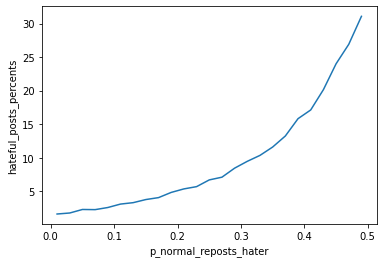

In [10]:
df_plot = df_posts.reset_index()
sns.lineplot(data=df_plot, x="p_normal_reposts_hater", y="hateful_posts_percents")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=76a22323-d43c-4823-9752-036f6744cf38' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>